$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Deep \space Learning $$
$$ Using \space CNN \space for \space CIFAR10 \space and \space MNIST \space Datasets $$

# `01` Assignment 01
- Design your own `deep NN` to classify the `CIFAR 10` images (you can download from keras.dataset) into one of the 10 classes
- Investigate the use of different architectures (`different layers`, `learning rate`, `optimizers`, `loss function`)
- Note you will need to `flatten` the image and use it as your input vector

## `+` Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPooling2D,BatchNormalization,Activation,GlobalAveragePooling2D,UpSampling2D
from keras.models import Sequential
from tensorflow.keras.datasets import cifar10,mnist
from keras.utils import set_random_seed
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1,l2
from keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input


## `+` Set Global variables

In [3]:
EPOCHS = 100
BATCH_SIZE = 64
SEED = 124

In [4]:
### Initialize Rondom_Seed
set_random_seed(SEED)

## `+` Load & Preprocess CIFAR 10 Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


### Preview the Images

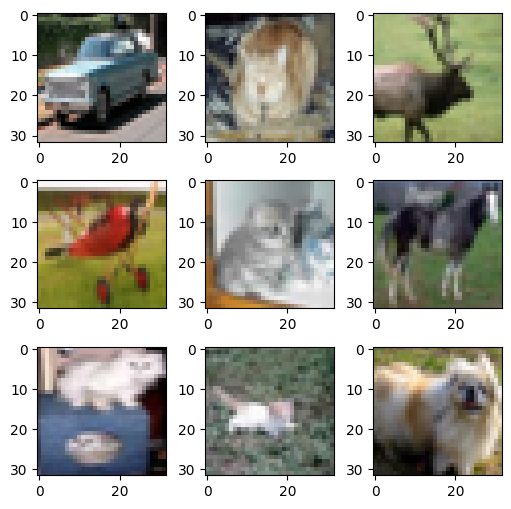

In [ ]:
X_sample = X_train[32:32+9]

fig, axes = plt.subplots(3, 3, figsize=(6, 6))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_sample[i])
plt.show();


### Feature Rescaling

In [ ]:
# Rescale Input
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

### OneHotEncode Target Variable

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

y_train.shape, y_test.shape

((50000, 10), (10000, 10))

## `i` Trial no. 1

### Model Training

In [ ]:
model_1 = Sequential()
model_1.add(Input(shape=X_train.shape[1:]))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(10, activation='softmax'))
model_1.compile(optimizer=keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 404,010 (1.54 MB)

 Trainable params: 404,010 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model_1.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2388 - loss: 2.0492 - val_accuracy: 0.3413 - val_loss: 1.8119
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3621 - loss: 1.7644 - val_accuracy: 0.3701 - val_loss: 1.7357
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3946 - loss: 1.6768 - val_accuracy: 0.4030 - val_loss: 1.6695
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4202 - loss: 1.6183 - val_accuracy: 0.4097 - val_loss: 1.6500
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4373 - loss: 1.5771 - val_accuracy: 0.4242 - val_loss: 1.6168
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4488 - loss: 1.5466 - val_accuracy: 0.4342 - val_loss: 1.5901
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4582 - loss: 1.5242 - val_accuracy: 0.4445 - val_loss: 1.5721
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4642 - loss: 1.5019 - val_accu

### Model Evaluation

In [ ]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
train_ev = model_1.evaluate(X_train,y_train)
print(f'Accuracy for training: {train_ev[1]*100:.2f}')
test_ev = model_1.evaluate(X_test, y_test)
print(f'Accuracy for testing: {test_ev[1]*100:.2f}')


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5429 - loss: 1.3114
Accuracy for training: 52.39
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4488 - loss: 1.7860
Accuracy for testing: 44.32


### Result Visualization

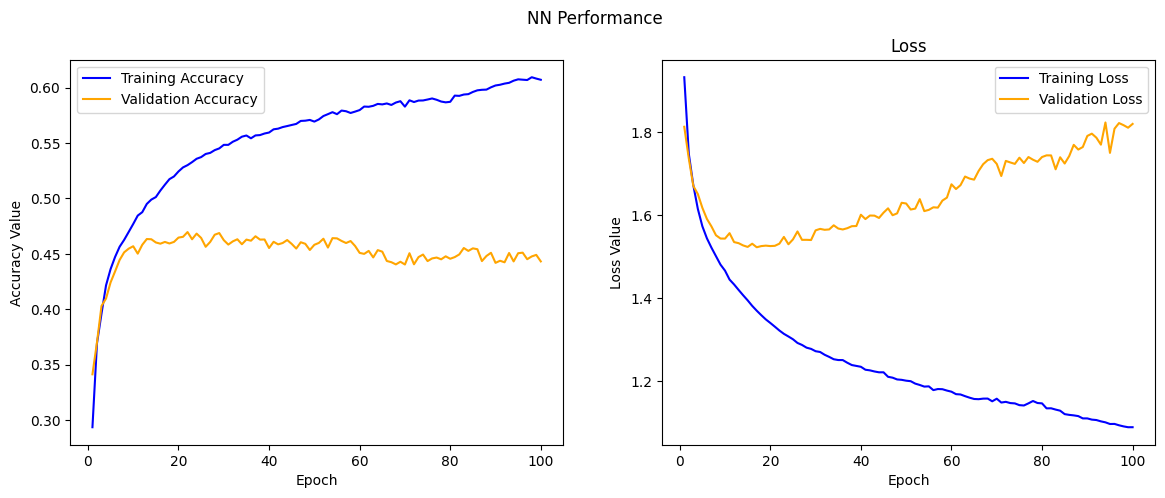

In [ ]:
Acc = hist.history['accuracy']
Val_Acc = hist.history['val_accuracy']
Loss = hist.history['loss']
Val_Loss = hist.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('NN Performance')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

## `ii` Trial no. 2

### Model Training

In [ ]:
## using early stopping as Regularization technique

model_2 = Sequential()
model_2.add(Input(shape=X_train.shape[1:]))
model_2.add(Flatten())

model_2.add(Dense(512))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))

model_2.add(Dense(124))
model_2.add(Dropout(0.2))
model_2.add(Activation('relu'))

model_2.add(Dense(64))
model_2.add(Dropout(0.3))
model_2.add(Activation('relu'))

model_2.add(Dense(32))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))

model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

model_2.compile(optimizer=keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='accuracy', patience=15, restore_best_weights=True)

model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 124)                 │          63,612 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 124)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 124)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,649,942 (6.29 MB)

 Trainable params: 1,648,854 (6.29 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [ ]:
hist2 = model_2.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[early_stop])


Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1951 - loss: 2.2008 - val_accuracy: 0.3281 - val_loss: 1.9860
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3303 - loss: 1.9455 - val_accuracy: 0.3750 - val_loss: 1.8359
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3890 - loss: 1.7800 - val_accuracy: 0.3757 - val_loss: 1.7634
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4230 - loss: 1.6671 - val_accuracy: 0.4152 - val_loss: 1.6632
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4461 - loss: 1.5937 - val_accuracy: 0.4344 - val_loss: 1.5984
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4655 - loss: 1.5288 - val_accuracy: 0.4398 - val_loss: 1.5883
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4819 - loss: 1.4822 - val_accuracy: 0.4458 - val_loss: 1.5736
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4970 - loss: 1.4256 - val_accu

### Model Evaluation

In [ ]:
train_ev = model_2.evaluate(X_train,y_train)
print(f'Accuracy for training: {train_ev[1]*100:.2f}')
test_ev = model_2.evaluate(X_test, y_test)
print(f'Accuracy for testing: {test_ev[1]*100:.2f}')


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7792 - loss: 0.8019
Accuracy for training: 72.27
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4660 - loss: 2.7767
Accuracy for testing: 46.75


### Result Visualization

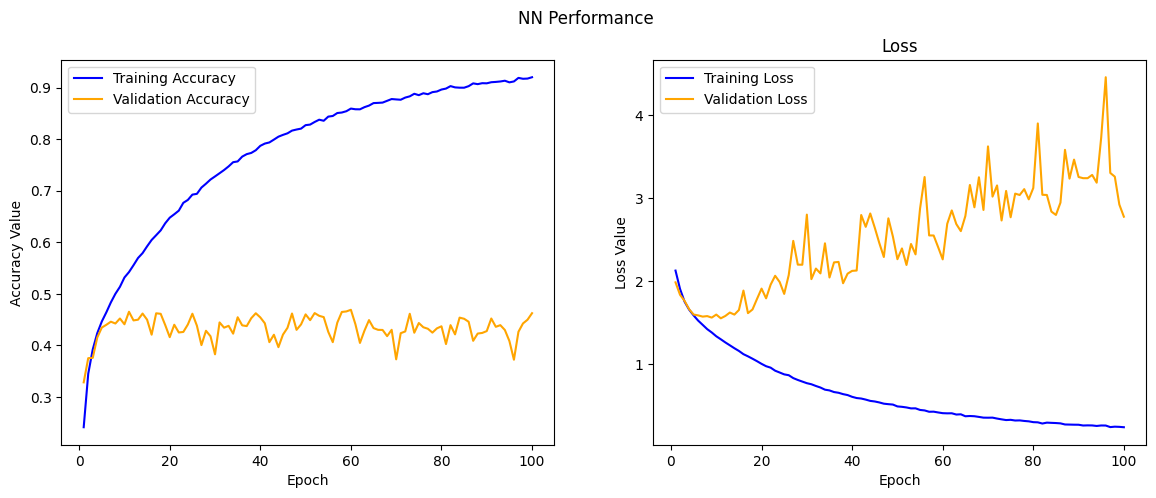

In [ ]:
Acc = hist2.history['accuracy']
Val_Acc = hist2.history['val_accuracy']
Loss = hist2.history['loss']
Val_Loss = hist2.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('NN Performance')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

**Note:** Add more trials and explore different hyperparameters and design decisions.

## `iii` Trial no. 3

### Model Training

In [ ]:
## change optimizer
model_3 = Sequential()

model_3.add(Input(shape=X_train.shape[1:]))
model_3.add(Flatten())

model_3.add(Dense(512))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Dense(124))
model_3.add(Dropout(0.2))
model_3.add(Activation('relu'))

model_3.add(Dense(64))
model_3.add(Dropout(0.3))
model_3.add(Activation('relu'))

model_3.add(Dense(32))
model_3.add(BatchNormalization())
model_3.add(Activation('relu'))

model_3.add(Dense(16, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

model_3.compile(optimizer=keras.optimizers.Adamax(0.001), loss='categorical_crossentropy', metrics=['accuracy','Precision'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 124)                 │          63,612 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 124)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 124)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,649,942 (6.29 MB)

 Trainable params: 1,648,854 (6.29 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [ ]:

hist3 = model_3.fit(X_train,y_train , epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.25, callbacks=[early_stop])


Epoch 1/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - Precision: 0.5193 - accuracy: 0.2280 - loss: 2.1613 - val_Precision: 0.6356 - val_accuracy: 0.3360 - val_loss: 1.8918
Epoch 2/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.6442 - accuracy: 0.3822 - loss: 1.7720 - val_Precision: 0.6258 - val_accuracy: 0.3715 - val_loss: 1.7694
Epoch 3/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.6560 - accuracy: 0.4188 - loss: 1.6323 - val_Precision: 0.6494 - val_accuracy: 0.4078 - val_loss: 1.6425
Epoch 4/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.6744 - accuracy: 0.4530 - loss: 1.5374 - val_Precision: 0.6816 - val_accuracy: 0.4402 - val_loss: 1.5813
Epoch 5/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.6955 - accuracy: 0.4792 - loss: 1.4700 - val_Precision: 0.6409 - val_accuracy: 0.4431 - val_loss: 1.5745
Epoch 6/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.7031 - accuracy: 0.5005 - loss: 1.4080 - val_Precision: 0.6233 - va

### Model Evaluation



In [ ]:
train_ev = model_3.evaluate(X_train,y_train)
print(f'Accuracy for training: {train_ev[1]*100:.2f}')
test_ev = model_3.evaluate(X_test, y_test)
print(f'Accuracy for testing: {test_ev[1]*100:.2f}')

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Precision: 0.7481 - accuracy: 0.5249 - loss: 1.3447
Accuracy for training: 51.09
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.6771 - accuracy: 0.4756 - loss: 1.4962
Accuracy for testing: 46.39


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
The class of predicted sample: 5
The actual class of the same sample: 4
Match: False


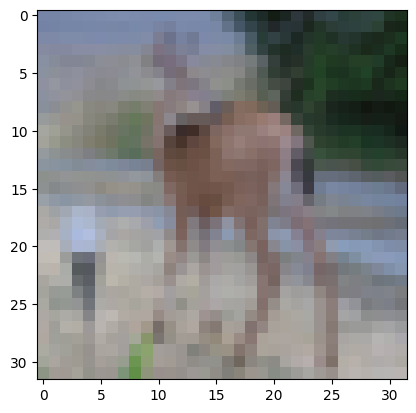

In [ ]:
## just check......
my_image = X_test[100]
plt.imshow(my_image)


pred = np.argmax(model_3.predict(X_test[100:101]))
actual = np.argmax(y_test[100])


print(f'The class of predicted sample: {pred}')
print(f'The actual class of the same sample: {actual}')
print("Match:", pred == actual)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The class of predicted sample: 2
The actual class of the same sample: 2
Match: True


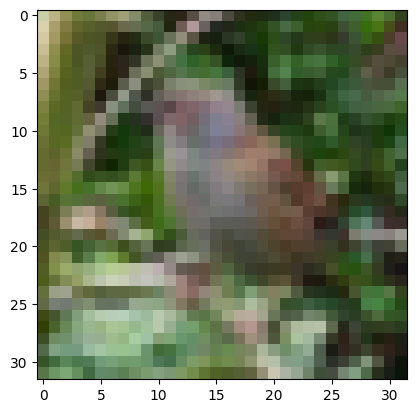

In [ ]:
## just check......
my_image = X_test[65]
plt.imshow(my_image)


pred = np.argmax(model_3.predict(X_test[65:66]))
actual = np.argmax(y_test[65])


print(f'The class of predicted sample: {pred}')
print(f'The actual class of the same sample: {actual}')
print("Match:", pred == actual)


In [ ]:
probs = model_3.predict(X_test[65:66])
print(f"Predicted probabilities: {probs}")
print(f"Confidence: {max(probs[0])}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted probabilities: [[0.01180495 0.00237341 0.4118265  0.11838115 0.1659855  0.12064827
  0.14096296 0.01991044 0.00601217 0.00209454]]
Confidence: 0.411826491355896


### Result Visualization

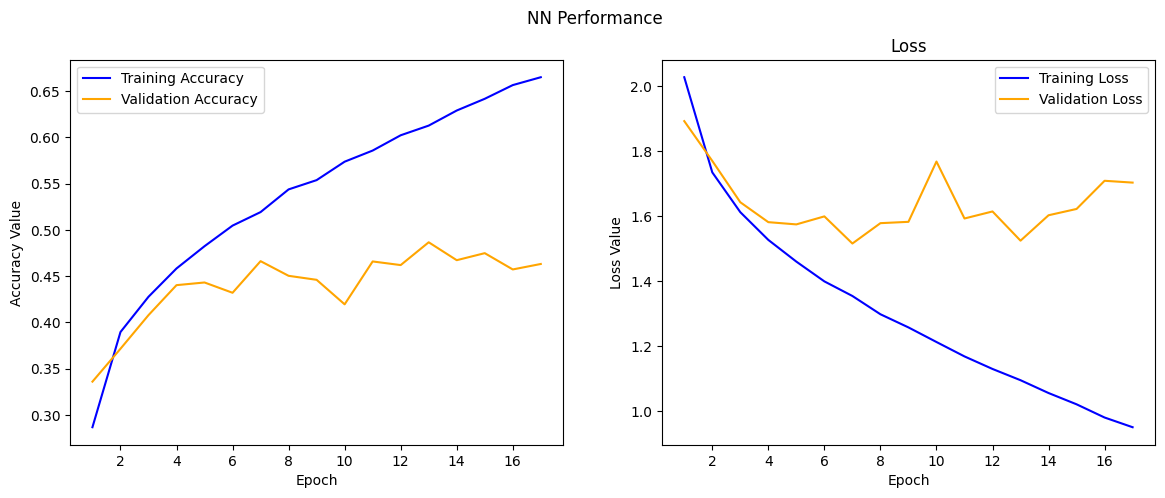

In [ ]:
Acc = hist3.history['accuracy']
Val_Acc = hist3.history['val_accuracy']
Loss = hist3.history['loss']
Val_Loss = hist3.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('NN Performance')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

---------------
## `iv` Trial no. 4


### Model Training

In [ ]:
## add some regularization like L1...

model_4 = Sequential()

model_4.add(Input(shape=X_train.shape[1:]))
model_4.add(Flatten())

model_4.add(Dense(512))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))

model_4.add(Dense(248))
model_4.add(Dropout(0.3))
model_4.add(Activation('relu'))

model_4.add(Dense(124))
model_4.add(Dropout(0.2))
model_4.add(Activation('relu'))

model_4.add(Dense(64))
model_4.add(Dropout(0.3))
model_4.add(Activation('relu'))

model_4.add(Dense(32))
model_4.add(BatchNormalization())
model_4.add(Activation('relu'))

model_4.add(Dense(16, activation='relu'))

model_4.add(Dense(10, activation='softmax'))
model_4.compile(optimizer=keras.optimizers.Adam(0.001),loss='categorical_crossentropy',metrics=['accuracy', 'Precision'])


early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 248)                 │         127,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 248)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 248)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 124)                 │          30,876 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 124)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 124)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,744,430 (6.65 MB)

 Trainable params: 1,743,342 (6.65 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [ ]:

hist4 = model_4.fit(X_train,y_train , epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.25, callbacks=[early_stop])


Epoch 1/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - Precision: 0.4873 - accuracy: 0.2173 - loss: 2.1531 - val_Precision: 0.6206 - val_accuracy: 0.3309 - val_loss: 1.8621
Epoch 2/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.6157 - accuracy: 0.3616 - loss: 1.7669 - val_Precision: 0.5741 - val_accuracy: 0.3687 - val_loss: 1.7454
Epoch 3/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.6530 - accuracy: 0.4125 - loss: 1.6367 - val_Precision: 0.6439 - val_accuracy: 0.3419 - val_loss: 1.7848
Epoch 4/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.6724 - accuracy: 0.4524 - loss: 1.5456 - val_Precision: 0.6568 - val_accuracy: 0.4051 - val_loss: 1.6411
Epoch 5/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.6793 - accuracy: 0.4777 - loss: 1.4792 - val_Precision: 0.5564 - val_accuracy: 0.3970 - val_loss: 1.6577
Epoch 6/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.6987 - accuracy: 0.5066 - loss: 1.4105 - val_Precision: 0.6458 - 

### Model Evaluation

In [ ]:

train_ev = model_4.evaluate(X_train,y_train)
print(f'Accuracy for training: {train_ev[1]*100:.2f}')
test_ev = model_4.evaluate(X_test, y_test)
print(f'Accuracy for testing: {test_ev[1]*100:.2f}')

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Precision: 0.6928 - accuracy: 0.5210 - loss: 1.3529
Accuracy for training: 50.60
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Precision: 0.6152 - accuracy: 0.4511 - loss: 1.5691
Accuracy for testing: 45.16


### Result Visualization


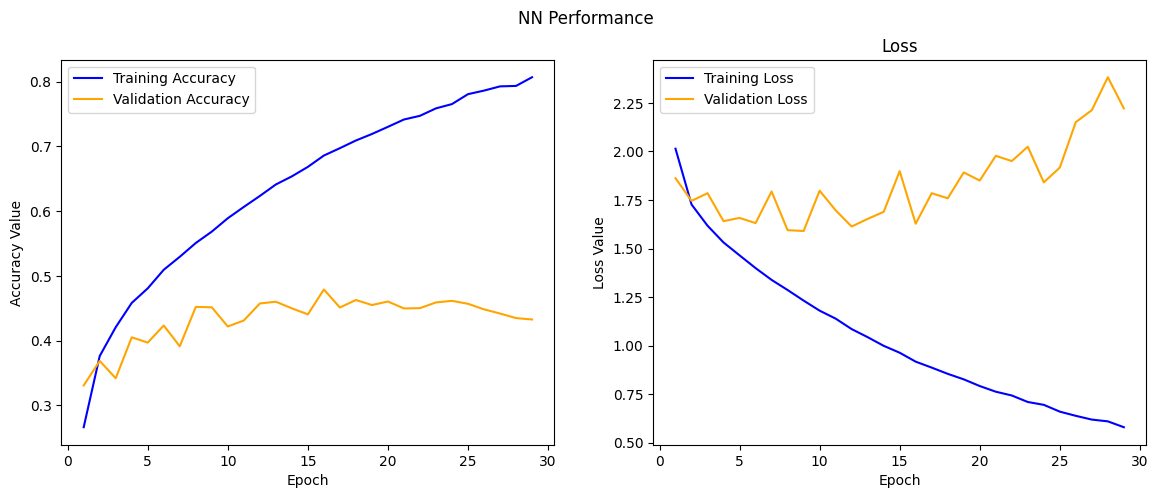

In [ ]:
Acc = hist4.history['accuracy']
Val_Acc = hist4.history['val_accuracy']
Loss = hist4.history['loss']
Val_Loss = hist4.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('NN Performance')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

---------------
## `v` Trial no. 5


### Model Training

In [ ]:
## add some regularization like L1...

model_5 = Sequential()

model_5.add(Input(shape=X_train.shape[1:]))
model_5.add(Flatten())

model_5.add(Dense(1024))
model_5.add(Dropout(0.4))
model_5.add(Activation('relu'))

model_5.add(Dense(512))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))

model_5.add(Dense(124))
model_5.add(Dropout(0.3))
model_5.add(Activation('relu'))

model_5.add(Dense(64))
model_5.add(BatchNormalization())
model_5.add(Activation('relu'))

model_5.add(Dense(32))
model_5.add(Dropout(0.2))
model_5.add(Activation('relu'))

model_5.add(Dense(16, activation='relu'))

model_5.add(Dense(10, activation='softmax'))
model_5.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),loss='categorical_crossentropy',metrics=['accuracy'])


# early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_5.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 124)                 │          63,612 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 124)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 124)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,748,246 (14.30 MB)

 Trainable params: 3,747,094 (14.29 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:

hist5 = model_5.fit(X_train,y_train , epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)


Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1325 - loss: 2.3139 - val_accuracy: 0.2213 - val_loss: 2.1177
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2106 - loss: 2.1133 - val_accuracy: 0.2803 - val_loss: 1.9678
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2515 - loss: 2.0065 - val_accuracy: 0.3160 - val_loss: 1.8916
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2858 - loss: 1.9422 - val_accuracy: 0.3411 - val_loss: 1.8426
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3031 - loss: 1.8952 - val_accuracy: 0.3525 - val_loss: 1.7889
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3160 - loss: 1.8638 - val_accuracy: 0.3586 - val_loss: 1.7703
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3295 - loss: 1.8352 - val_accuracy: 0.3770 - val_loss: 1.7315
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3381 - loss: 1.8170 - val_accu

### Model Evaluation


In [ ]:
train_loss, train_acc = model_5.evaluate(X_train, y_train)
test_loss, test_acc = model_5.evaluate(X_test, y_test)

print(f"Accuracy for training: {train_acc * 100:.2f}")
print(f"Accuracy for testing: {test_acc * 100:.2f}")


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6647 - loss: 0.9467
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5385 - loss: 1.3351
Accuracy for training: 63.79
Accuracy for testing: 53.41


### Result Visualization

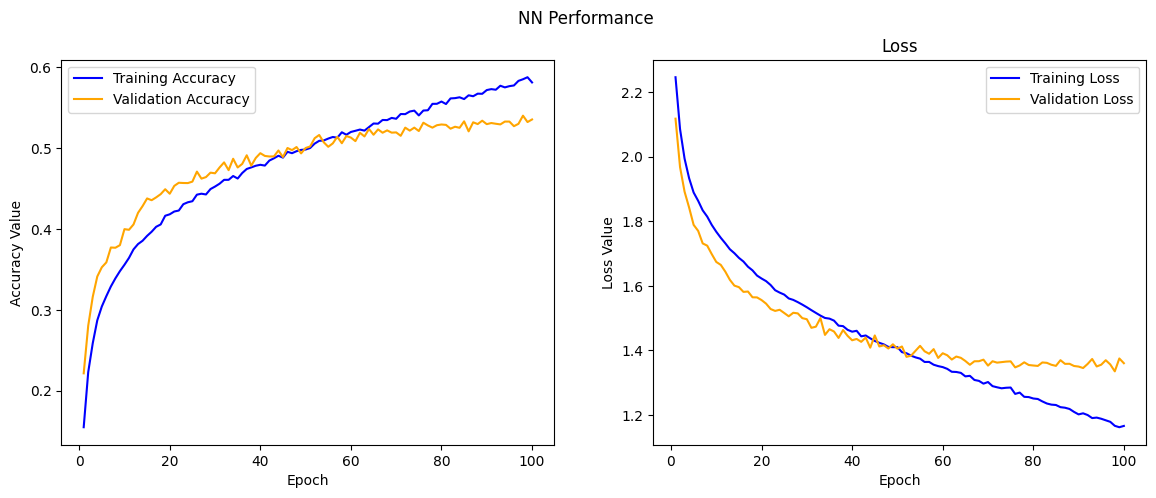

In [ ]:
Acc = hist5.history['accuracy']
Val_Acc = hist5.history['val_accuracy']
Loss = hist5.history['loss']
Val_Loss = hist5.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('NN Performance')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

------------------------------

# Assignment 02: Transfer Learning
- Design your `deep convolutional neural network` to classify the `CIFAR 10` images into one of the 10 classes
- Use a pre-trained model to boost your network.
- Invistage the use of different architectures (different `layers`, `kernel sizes`, `pooling`, `learning rate`, `optimizers`, `loss function`)

You have to specify filters and kernel_size. These parameters have no default.

Default padding is valid, which means no zero-padding, and the default strides is (1,1).

$\frac{N - F + 2P}{S} + 1$

$P = \frac{F - 1}{2}$

## `i` Trial no. 1

### Model Training

In [9]:
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:

# Unfreeze last 5 layers for fine-tuning
# for layer in resnet_base.layers[-5:]:
#     layer.trainable = True


transfer_model = Sequential()
transfer_model.add(Input(shape=X_train.shape[1:]))

## resize input according to the resnet inputs
transfer_model.add(UpSampling2D(size=(7, 7)))

transfer_model.add(resnet_base)

transfer_model.add(GlobalAveragePooling2D()) ## As a flatten layer

transfer_model.add(Dense(32 , kernel_regularizer=l2(0.01)))
transfer_model.add(Dropout(0.4))
transfer_model.add(Activation('relu'))

transfer_model.add(Dense(16 , kernel_regularizer=l2(0.01)))
transfer_model.add(BatchNormalization())
transfer_model.add(Activation('relu'))

transfer_model.add(Dense(10, activation='softmax'))


transfer_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy','Precision'])
early_stop = EarlyStopping(monitor='accuracy', patience=15, restore_best_weights=True)


transfer_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ up_sampling2d (UpSampling2D)         │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │          65,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,654,042 (90.23 MB)

 Trainable params: 23,600,890 (90.03 MB)

 Non-trainable params: 53,152 (207.62 KB)

In [ ]:
pre_hist = transfer_model.fit(X_train,y_train, epochs=50, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 239s 287ms/step - Precision: 0.8575 - accuracy: 0.4493 - loss: 2.5663 - val_Precision: 0.0000e+00 - val_accuracy: 0.1279 - val_loss: 2.8524
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 276ms/step - Precision: 0.9681 - accuracy: 0.8417 - loss: 1.5051 - val_Precision: 0.0000e+00 - val_accuracy: 0.1116 - val_loss: 2.6347
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 277ms/step - Precision: 0.9740 - accuracy: 0.9073 - loss: 1.0009 - val_Precision: 0.0000e+00 - val_accuracy: 0.1039 - val_loss: 2.6314
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 276ms/step - Precision: 0.9764 - accuracy: 0.9343 - loss: 0.7071 - val_Precision: 0.1390 - val_accuracy: 0.1014 - val_loss: 3.1044
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 276ms/step - Precision: 0.9774 - accuracy: 0.9481 - loss: 0.5259 - val_Precision: 0.8144 - val_accuracy: 0.2019 - val_loss: 2.3641
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 277ms/step - Precision: 0.9822 - accuracy: 0.9637 - loss: 0.392

### Model Evaluation

In [ ]:
train_ev = transfer_model.evaluate(X_train,y_train)
print(f'Accuracy for training: {train_ev[1]*100:.2f}')
test_ev = transfer_model.evaluate(X_test, y_test)
print(f'Accuracy for testing: {test_ev[1]*100:.2f}')

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 40ms/step - Precision: 0.1836 - accuracy: 0.1823 - loss: 4.9258
Accuracy for training: 18.08
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - Precision: 0.1765 - accuracy: 0.1755 - loss: 4.9971
Accuracy for testing: 17.69


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The class of predicted sample: 1
The actual class of the same sample: 4
Match: False


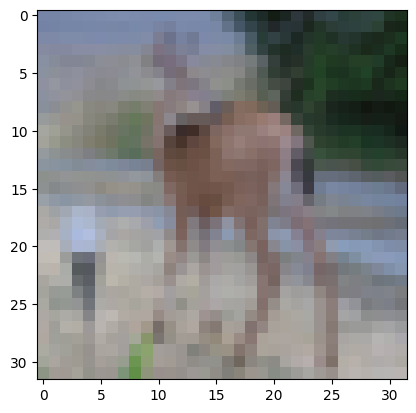

In [ ]:
## just check......
my_image = X_test[100]
plt.imshow(my_image)


pred = np.argmax(transfer_model.predict(X_test[100:101]))
actual = np.argmax(y_test[100])


print(f'The class of predicted sample: {pred}')
print(f'The actual class of the same sample: {actual}')
print("Match:", pred == actual)

### Result Visualization

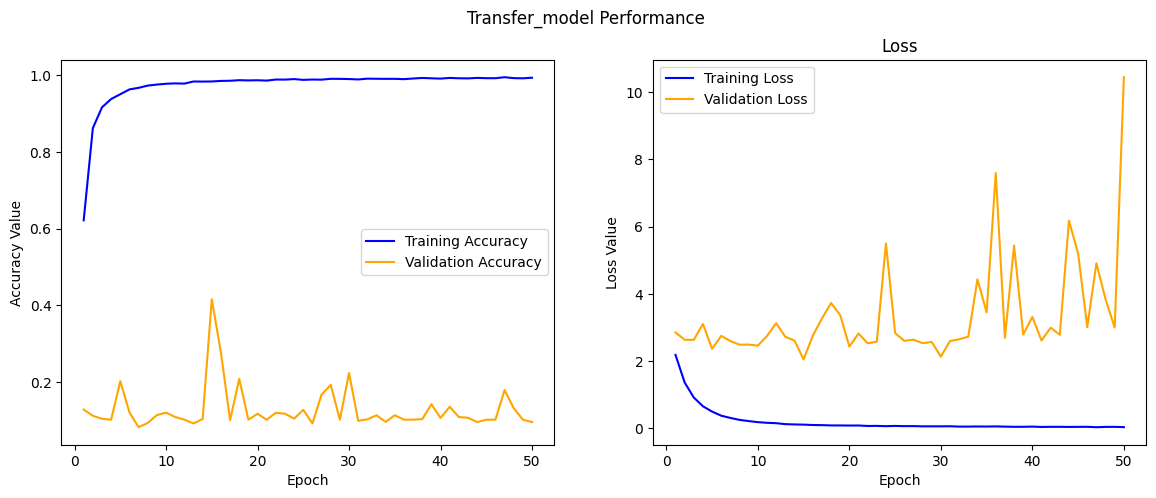

In [ ]:
Acc = pre_hist.history['accuracy']
Val_Acc = pre_hist.history['val_accuracy']
Loss = pre_hist.history['loss']
Val_Loss = pre_hist.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('Transfer_model Performance')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

## `ii` Trial no. 2

### Model Training

In [ ]:
# Unfreeze last 5 layers for fine-tuning
for layer in resnet_base.layers[:-5]:
    layer.trainable = False

res_model = Sequential()
res_model.add(Input(shape=X_train.shape[1:]))
## resize input according to the resnet inputs
res_model.add(UpSampling2D(size=(7, 7)))

res_model.add(resnet_base)
res_model.add(GlobalAveragePooling2D()) ## flatten ...


res_model.add(Dense(1024))
res_model.add(Dropout(0.5)) ## reduce overfitting
res_model.add(Activation('relu'))

res_model.add(Dense(512))
res_model.add(BatchNormalization())
res_model.add(Activation('relu'))

res_model.add(Dense(10, activation="softmax"))

res_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


res_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ up_sampling2d_9 (UpSampling2D)       │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_9           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_43 (Activation)           │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_44 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,217,866 (100.01 MB)

 Trainable params: 3,683,850 (14.05 MB)

 Non-trainable params: 22,534,016 (85.96 MB)

In [ ]:
res_hist = res_model.fit(X_train,y_train, epochs=50, batch_size=BATCH_SIZE, validation_split=0.2,callbacks=[early_stop])

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 101ms/step - accuracy: 0.1608 - loss: 2.3311 - val_accuracy: 0.2594 - val_loss: 1.9224
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.2662 - loss: 1.9260 - val_accuracy: 0.3046 - val_loss: 1.8474
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.2914 - loss: 1.8793 - val_accuracy: 0.3054 - val_loss: 1.8287
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.3003 - loss: 1.8470 - val_accuracy: 0.3132 - val_loss: 1.8069
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.3073 - loss: 1.8384 - val_accuracy: 0.3262 - val_loss: 1.7899
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.3163 - loss: 1.8233 - val_accuracy: 0.3373 - val_loss: 1.7778
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 94ms/step - accuracy: 0.3234 - loss: 1.8092 - val_accuracy: 0.3315 - val_loss: 1.7851
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.3243 - loss: 1.7985 -

### Model Evaluation

In [ ]:
train_loss, train_acc = res_model.evaluate(X_train, y_train)
test_loss, test_acc = res_model.evaluate(X_test, y_test)

print(f"Accuracy for training: {train_acc * 100:.2f}")
print(f"Accuracy for testing: {test_acc * 100:.2f}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 39ms/step - accuracy: 0.4263 - loss: 1.5715
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.4117 - loss: 1.5918
Accuracy for training: 42.10
Accuracy for testing: 41.87


### Result Visualization

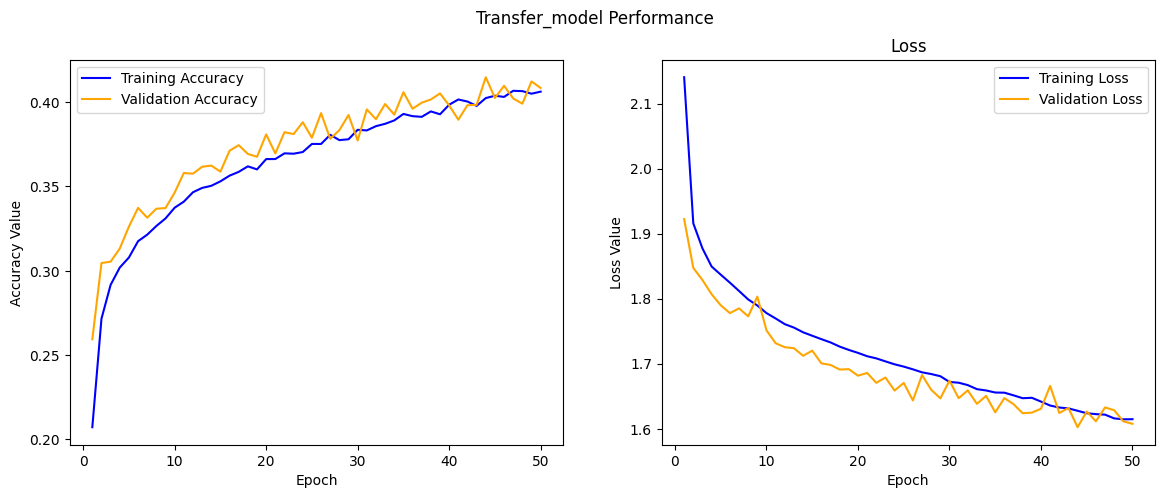

In [ ]:
# Plot the training accuracy and loss

Acc = res_hist.history['accuracy']
Val_Acc = res_hist.history['val_accuracy']
Loss = res_hist.history['loss']
Val_Loss = res_hist.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('Transfer_model Performance')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

## `iii` Trial no. 3

## Model Training

#### The same as the previous model but apply the preprocess of the resnet model

In [5]:
## read data again to skip the scaling step we applied before.....
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [6]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:

## processing the input according to the way of the resnet model
X_train_pro = preprocess_input(X_train)
X_test_pro = preprocess_input(X_test)



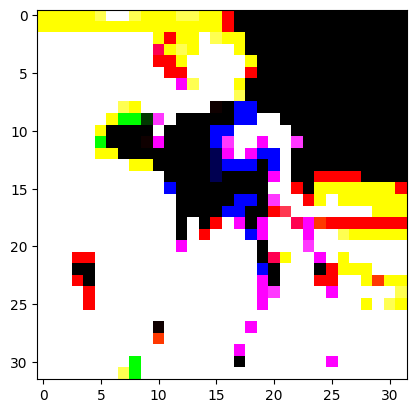

In [8]:
my_image = X_test_pro[100]

plt.imshow(my_image)

--------------------------

### Try to freeze all the model, then unfreeze some of its layers for fine-tuning then compile and fit again with small learning rate and small no of epochs.....................

In [10]:
# Unfreeze last 5 layers for fine-tuning
for layer in resnet_base.layers[:-5]:
    layer.trainable = False




res_model2 = Sequential()
res_model2.add(Input(shape=X_train.shape[1:]))
## resize input according to the resnet inputs
res_model2.add(UpSampling2D(size=(7, 7)))

res_model2.add(resnet_base)
res_model2.add(GlobalAveragePooling2D()) ## flatten ...


res_model2.add(Dense(1024))
res_model2.add(Dropout(0.4)) ## reduce overfitting
res_model2.add(Activation('relu'))

res_model2.add(Dense(512))
res_model2.add(BatchNormalization())
res_model2.add(Activation('relu'))

res_model2.add(Dense(10, activation="softmax"))

res_model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


res_model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ up_sampling2d (UpSampling2D)         │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,217,866 (100.01 MB)

 Trainable params: 3,683,850 (14.05 MB)

 Non-trainable params: 22,534,016 (85.96 MB)

In [11]:
res_hist2 = res_model2.fit(X_train_pro,y_train, epochs=50, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 103ms/step - accuracy: 0.6223 - loss: 1.0973 - val_accuracy: 0.7996 - val_loss: 0.5660
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.8052 - loss: 0.5688 - val_accuracy: 0.8239 - val_loss: 0.4981
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.8434 - loss: 0.4506 - val_accuracy: 0.8336 - val_loss: 0.4733
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.8760 - loss: 0.3614 - val_accuracy: 0.8463 - val_loss: 0.4526
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.8999 - loss: 0.2953 - val_accuracy: 0.8320 - val_loss: 0.4947
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.9238 - loss: 0.2265 - val_accuracy: 0.8394 - val_loss: 0.4936
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.9458 - loss: 0.1695 - val_accuracy: 0.8414 - val_loss: 0.5108
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.9629 - loss: 0.1207 -

### Model Evaluation


In [12]:
train_loss, train_acc = res_model2.evaluate(X_train_pro, y_train)
test_loss, test_acc = res_model2.evaluate(X_test_pro, y_test)

print(f"Accuracy for training: {train_acc * 100:.2f}")
print(f"Accuracy for testing: {test_acc * 100:.2f}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 40ms/step - accuracy: 0.9918 - loss: 0.0363
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.8470 - loss: 1.0536
Accuracy for training: 96.49
Accuracy for testing: 84.17


### Result Visualization

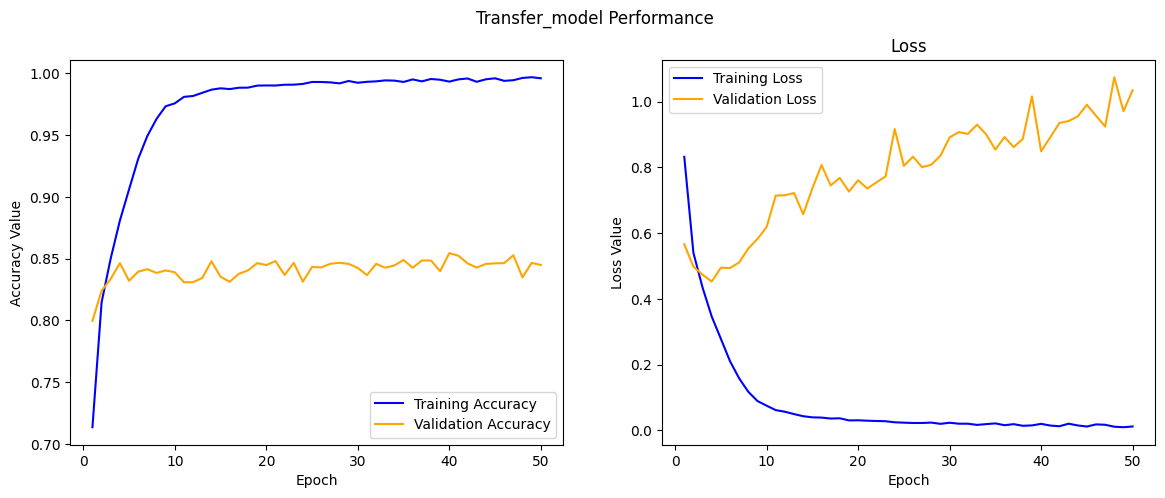

In [13]:
# Plot the training accuracy and loss

Acc = res_hist2.history['accuracy']
Val_Acc = res_hist2.history['val_accuracy']
Loss = res_hist2.history['loss']
Val_Loss = res_hist2.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('Transfer_model Performance')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
The class of predicted sample: 5
The actual class of the same sample: 5
Match: True


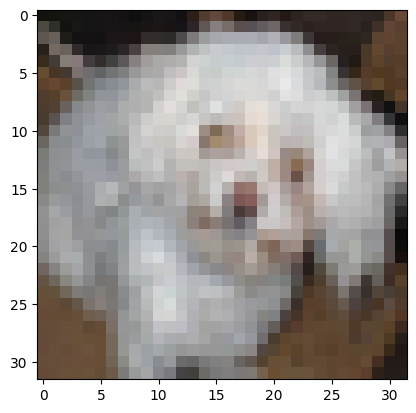

In [14]:
## just check......
my_image = X_test[1000]
plt.imshow(my_image)


pred = np.argmax(res_model2.predict(X_test_pro[1000:1001]))
actual = np.argmax(y_test[1000])


print(f'The class of predicted sample: {pred}')
print(f'The actual class of the same sample: {actual}')
print("Match:", pred == actual)

## One of available solutions to unfreeze some of model layers then refit the model with small Learning rate for just finetune the pretrained model weights

---

# `03` Assignment 03
- Repeat Assignment 1 and 2 using MNIST dataset but do NOT use transfer learning this time (design the network from scratch)
- Note that you will need to convert the training labels into categorical using one hot encoding using `to_categorical()` function

## `+` Load MNIST Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


### OneHotEncode Target Variable

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

### Preview the Images

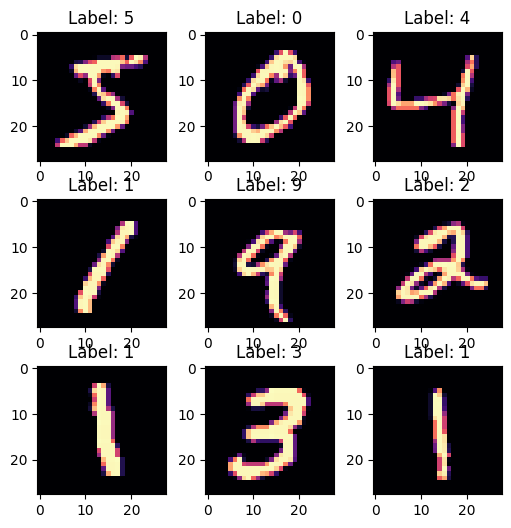

In [5]:
# plot first few images
X_sample = X_train[:9]

fig, axes = plt.subplots(3, 3, figsize=(6, 6))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_sample[i],cmap='magma')
    ax.set_title(f'Label: {np.argmax(y_train[i])}')

plt.show();


### Rescale Independent Features

In [ ]:
# Rescale the Input
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## `+` Set Global Parameters

In [ ]:
# Hyperparameters
BATCH_SIZE  = 64
NUM_CLASSES = 10
EPOCHS      = 100

## `i` ANN Trials

### Trial no. 1

#### Model Training

In [ ]:
### just flatten the input then add FC layers

model_Ann = Sequential()
model_Ann.add(Input(shape=X_train.shape[1:]))
model_Ann.add(Flatten())
model_Ann.add(Dense(512, activation='relu'))
model_Ann.add(Dense(128, activation='relu'))
model_Ann.add(Dense(64, activation='relu'))
model_Ann.add(Dense(32, activation='relu'))
model_Ann.add(Dense(NUM_CLASSES , activation='softmax'))
model_Ann.compile(optimizer=keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model_Ann.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 478,250 (1.82 MB)

 Trainable params: 478,250 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
mnist_hist1 = model_Ann.fit(X_train,y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6756 - loss: 1.0792 - val_accuracy: 0.9282 - val_loss: 0.2406
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9376 - loss: 0.2201 - val_accuracy: 0.9482 - val_loss: 0.1777
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9557 - loss: 0.1576 - val_accuracy: 0.9572 - val_loss: 0.1468
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9658 - loss: 0.1226 - val_accuracy: 0.9631 - val_loss: 0.1273
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.0986 - val_accuracy: 0.9671 - val_loss: 0.1148
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9777 - loss: 0.0808 - val_accuracy: 0.9690 - val_loss: 0.1078
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9822 - loss: 0.0669 - val_accuracy: 0.9695 - val_loss: 0.1033
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9854 - loss: 0.0556 - val_accu

#### Model Ealuation

In [ ]:
train_loss, train_acc = model_Ann.evaluate(X_train, y_train)
test_loss, test_acc = model_Ann.evaluate(X_test, y_test)

print(f"Accuracy for training: {train_acc * 100:.2f}")
print(f"Accuracy for testing: {test_acc * 100:.2f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9995 - loss: 0.0055
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.2647
Accuracy for training: 99.57
Accuracy for testing: 97.97


#### Result Visualization

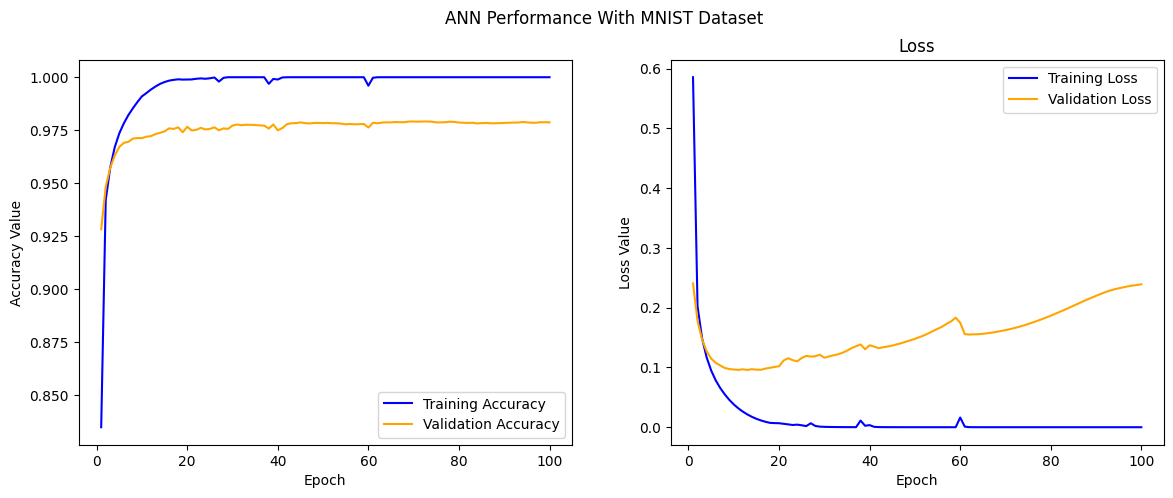

In [ ]:
# Plot the training accuracy and loss

Acc = mnist_hist1.history['accuracy']
Val_Acc = mnist_hist1.history['val_accuracy']
Loss = mnist_hist1.history['loss']
Val_Loss = mnist_hist1.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('ANN Performance With MNIST Dataset')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

### Trial no. 2

#### Model Training

In [ ]:
### just flatten the input then add FC layers
## try to change the optimizer

model_Ann2 = Sequential()
model_Ann2.add(Input(shape=X_train.shape[1:]))
model_Ann2.add(Flatten())
model_Ann2.add(Dense(512))
model_Ann2.add(Dropout(0.3))
model_Ann2.add(Activation('relu'))

model_Ann2.add(Dense(128, activation='relu'))
model_Ann2.add(Dense(64, activation='relu'))
model_Ann2.add(Dense(32, activation='relu'))
model_Ann2.add(Dense(NUM_CLASSES , activation='softmax'))
model_Ann2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0001,momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

model_Ann2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 478,250 (1.82 MB)

 Trainable params: 478,250 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
mnist_hist2 = model_Ann2.fit(X_train,y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1260 - loss: 2.2679 - val_accuracy: 0.3402 - val_loss: 2.1124
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2964 - loss: 2.0828 - val_accuracy: 0.5429 - val_loss: 1.7843
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5046 - loss: 1.7473 - val_accuracy: 0.7068 - val_loss: 1.3348
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6609 - loss: 1.3295 - val_accuracy: 0.7812 - val_loss: 0.9511
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7339 - loss: 1.0031 - val_accuracy: 0.8183 - val_loss: 0.7207
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7737 - loss: 0.8057 - val_accuracy: 0.8421 - val_loss: 0.5924
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8011 - loss: 0.6906 - val_accuracy: 0.8592 - val_loss: 0.5139
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8225 - loss: 0.6092 - val_accu

#### Model Evaluation

In [ ]:
train_loss, train_acc = model_Ann2.evaluate(X_train, y_train)
test_loss, test_acc = model_Ann2.evaluate(X_test, y_test)

print(f"Accuracy for training: {train_acc * 100:.2f}")
print(f"Accuracy for testing: {test_acc * 100:.2f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9722 - loss: 0.0969
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9559 - loss: 0.1374
Accuracy for training: 96.99
Accuracy for testing: 96.30


#### Result Visualization

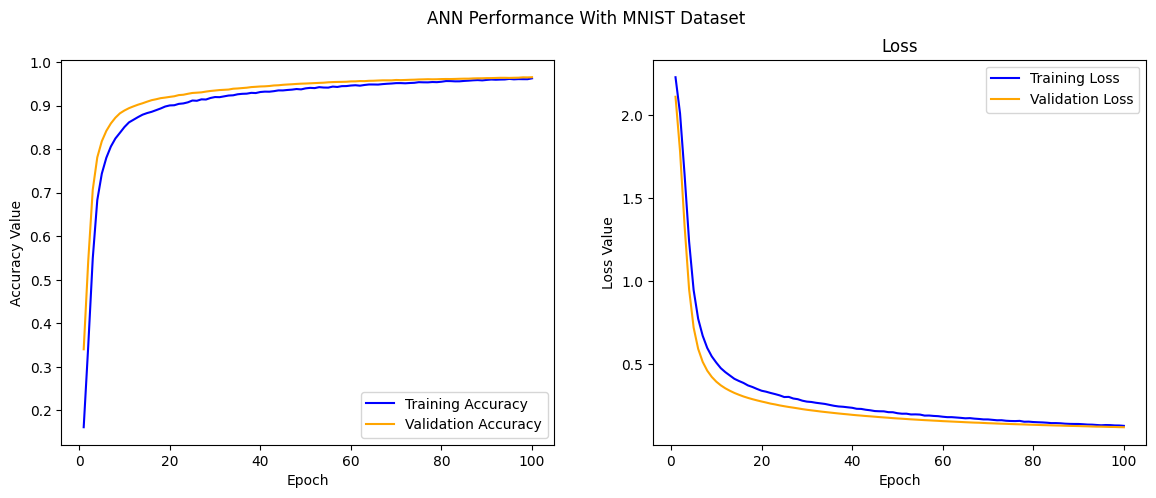

In [ ]:
# Plot the training accuracy and loss

Acc = mnist_hist2.history['accuracy']
Val_Acc = mnist_hist2.history['val_accuracy']
Loss = mnist_hist2.history['loss']
Val_Loss = mnist_hist2.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('ANN Performance With MNIST Dataset')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
The class of predicted sample: 9
The actual class of the same sample: 9
Match: True


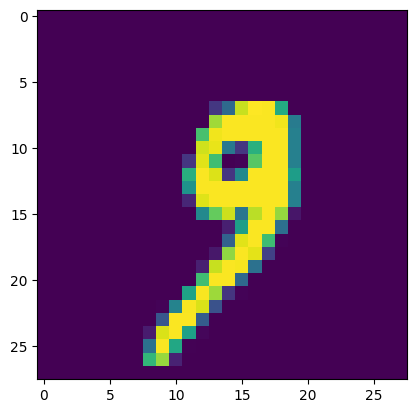

In [ ]:
## just check......
my_image = X_test[1000]
plt.imshow(my_image)


pred = np.argmax(model_Ann2.predict(X_test[1000:1001]))
actual = np.argmax(y_test[1000])


print(f'The class of predicted sample: {pred}')
print(f'The actual class of the same sample: {actual}')
print("Match:", pred == actual)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The class of predicted sample: 6
The actual class of the same sample: 6
Match: True


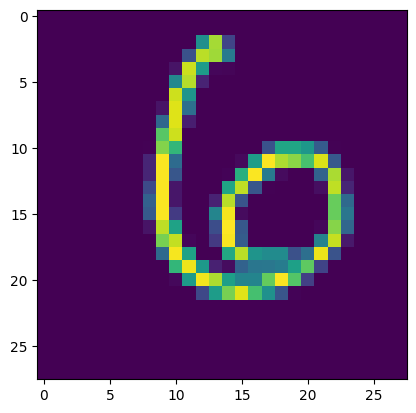

In [ ]:
## just check......
my_image = X_test[100]
plt.imshow(my_image)


pred = np.argmax(model_Ann2.predict(X_test[100:101]))
actual = np.argmax(y_test[100])


print(f'The class of predicted sample: {pred}')
print(f'The actual class of the same sample: {actual}')
print("Match:", pred == actual)

## `ii` CNN Trials

### Trial no. 1

#### Datasets Reshaping

In [ ]:
X_train =X_train.reshape(-1,28,28,1)
X_test =X_test.reshape(-1,28,28,1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### Model Training

In [ ]:
model_Cnn = Sequential()

### convalution layers --> make tow layers
model_Cnn.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model_Cnn.add(MaxPooling2D((2,2)))

model_Cnn.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model_Cnn.add(MaxPooling2D((2,2)))

## flatten layer
model_Cnn.add(Flatten())

## FC layers
model_Cnn.add(Dense(128))
model_Cnn.add(Dropout(0.2))
model_Cnn.add(Activation('relu'))

model_Cnn.add(Dense(64))
model_Cnn.add(Dropout(0.2))
model_Cnn.add(Activation('relu'))


model_Cnn.add(Dense(NUM_CLASSES , activation='softmax')) ## out layer

model_Cnn.compile(optimizer=keras.optimizers.SGD(learning_rate=0.0001,momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

model_Cnn.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Cnn_hist = model_Cnn.fit(X_train,y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1452 - loss: 2.2908 - val_accuracy: 0.3900 - val_loss: 2.2189
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3262 - loss: 2.1918 - val_accuracy: 0.5156 - val_loss: 1.9921
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4196 - loss: 1.9366 - val_accuracy: 0.6651 - val_loss: 1.4530
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5551 - loss: 1.4649 - val_accuracy: 0.7802 - val_loss: 0.9103
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6660 - loss: 1.0581 - val_accuracy: 0.8422 - val_loss: 0.6333
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7421 - loss: 0.8215 - val_accuracy: 0.8712 - val_loss: 0.4919
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7828 - loss: 0.6855 - val_accuracy: 0.8871 - val_loss: 0.4159
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8112 - loss: 0.6050 - val_accu

#### Model Evaluation

In [ ]:
train_loss, train_acc = model_Cnn.evaluate(X_train, y_train)
test_loss, test_acc = model_Cnn.evaluate(X_test, y_test)

print(f"Accuracy for training: {train_acc * 100:.2f}")
print(f"Accuracy for testing: {test_acc * 100:.2f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9845 - loss: 0.0497
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9798 - loss: 0.0665
Accuracy for training: 98.37
Accuracy for testing: 98.31


#### Result Visualization

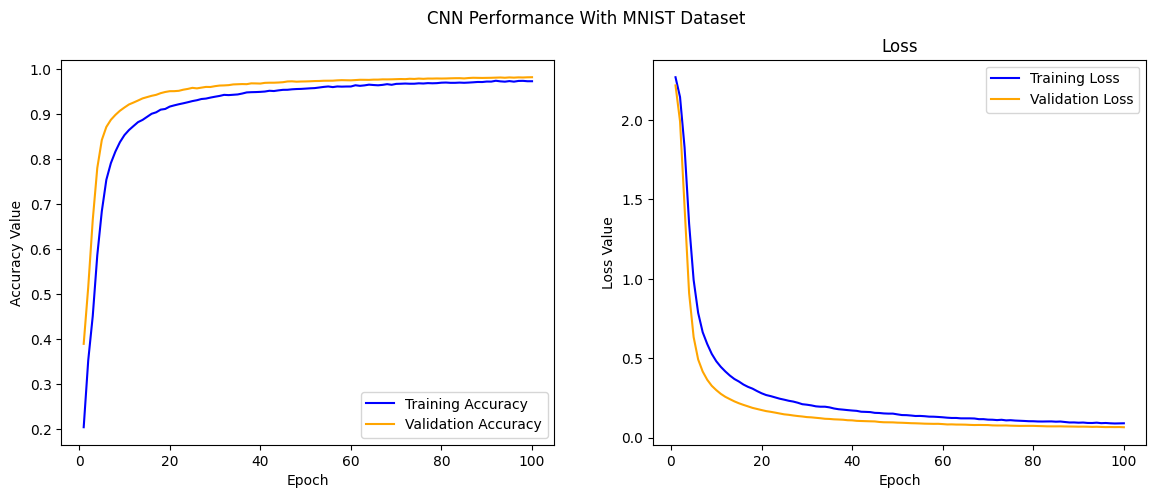

In [ ]:
# Plot the training accuracy and loss

Acc = Cnn_hist.history['accuracy']
Val_Acc = Cnn_hist.history['val_accuracy']
Loss = Cnn_hist.history['loss']
Val_Loss = Cnn_hist.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('CNN Performance With MNIST Dataset')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
The class of predicted sample: 3
The actual class of the same sample: 3
Match: True


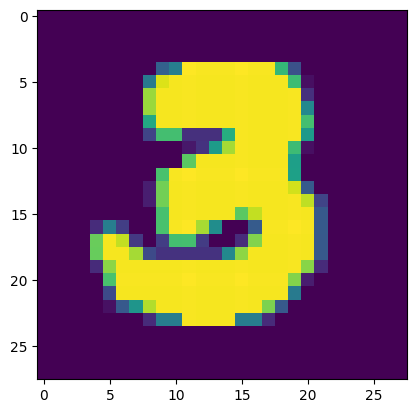

In [ ]:
## just check......
my_image = X_test[200]
plt.imshow(my_image)


pred = np.argmax(model_Cnn.predict(X_test[200:201]))
actual = np.argmax(y_test[200])


print(f'The class of predicted sample: {pred}')
print(f'The actual class of the same sample: {actual}')
print("Match:", pred == actual)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The class of predicted sample: 1
The actual class of the same sample: 1
Match: True


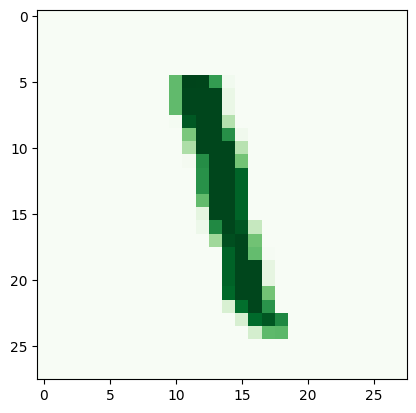

In [ ]:
## just check......
my_image = X_test[700]
plt.imshow(my_image,cmap='Greens')


pred = np.argmax(model_Cnn.predict(X_test[700:701]))
actual = np.argmax(y_test[700])


print(f'The class of predicted sample: {pred}')
print(f'The actual class of the same sample: {actual}')
print("Match:", pred == actual)

### Trial no. 2

#### Model Training

In [ ]:
model_Cnn2 = Sequential()

model_Cnn2.add(Conv2D(16, kernel_size = (3,3), padding='same', activation='relu', input_shape = X_train.shape[1:]))
model_Cnn2.add(Conv2D(16, kernel_size = (3,3), padding='same', activation='relu'))
model_Cnn2.add(MaxPooling2D((2,2)))

model_Cnn2.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
model_Cnn2.add(Conv2D(32, kernel_size = (3,3), activation='relu'))
model_Cnn2.add(MaxPooling2D((2,2)))


model_Cnn2.add(Flatten())

## FC layers
model_Cnn2.add(Dense(124))
model_Cnn2.add(Dropout(0.4))
model_Cnn2.add(Activation('relu'))

model_Cnn2.add(Dense(64))
model_Cnn2.add(BatchNormalization())
model_Cnn2.add(Activation('relu'))

model_Cnn2.add(Dense(NUM_CLASSES , activation='softmax')) ## out layer

model_Cnn2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model_Cnn2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 12, 12, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 10, 10, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 124)                 │          99,324 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 124)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 124)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 124,598 (486.71 KB)

 Trainable params: 124,470 (486.21 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
Cnn_hist2 = model_Cnn2.fit(X_train,y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5842 - loss: 1.3655 - val_accuracy: 0.9557 - val_loss: 0.2425
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9409 - loss: 0.3076 - val_accuracy: 0.9729 - val_loss: 0.1248
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9609 - loss: 0.1767 - val_accuracy: 0.9788 - val_loss: 0.0839
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9718 - loss: 0.1216 - val_accuracy: 0.9823 - val_loss: 0.0657
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9770 - loss: 0.0950 - val_accuracy: 0.9844 - val_loss: 0.0558
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9802 - loss: 0.0775 - val_accuracy: 0.9863 - val_loss: 0.0476
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9821 - loss: 0.0655 - val_accuracy: 0.9873 - val_loss: 0.0446
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9856 - loss: 0.0561 - val_accu

#### Model Evaluation

In [ ]:
train_loss, train_acc = model_Cnn2.evaluate(X_train, y_train)
test_loss, test_acc = model_Cnn2.evaluate(X_test, y_test)

print(f"Accuracy for training: {train_acc * 100:.2f}")
print(f"Accuracy for testing: {test_acc * 100:.2f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9998 - loss: 9.6445e-04
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9923 - loss: 0.0338
Accuracy for training: 99.84
Accuracy for testing: 99.36


#### Result Visualization

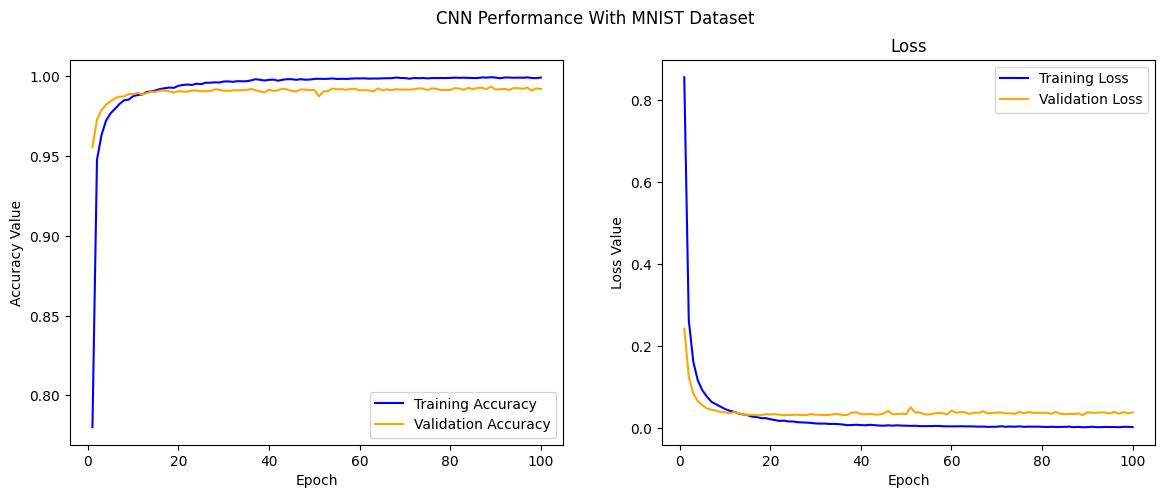

In [ ]:
# Plot the training accuracy and loss

Acc = Cnn_hist2.history['accuracy']
Val_Acc = Cnn_hist2.history['val_accuracy']
Loss = Cnn_hist2.history['loss']
Val_Loss = Cnn_hist2.history['val_loss']
epochs = range(1, len(Acc) + 1)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Accuracy
ax[0].plot(epochs, Acc, label='Training Accuracy', color='blue')
ax[0].plot(epochs, Val_Acc, label='Validation Accuracy', color='orange')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy Value')
ax[0].legend()

fig.suptitle('CNN Performance With MNIST Dataset')
# Plot Loss
ax[1].plot(epochs,Loss, label='Training Loss', color='blue')
ax[1].plot(epochs, Val_Loss, label='Validation Loss', color='orange')
ax[1].set_title('Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss Value')
ax[1].legend()

plt.show();



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The class of predicted sample: 8
The actual class of the same sample: 8
Match: True


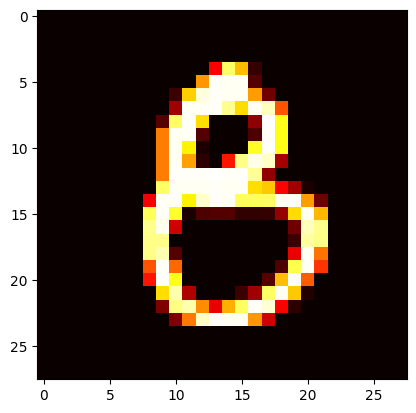

In [ ]:
## just check......
my_image = X_test[800]
plt.imshow(my_image,cmap='hot')


pred = np.argmax(model_Cnn2.predict(X_test[800:801]))
actual = np.argmax(y_test[800])


print(f'The class of predicted sample: {pred}')
print(f'The actual class of the same sample: {actual}')
print("Match:", pred == actual)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


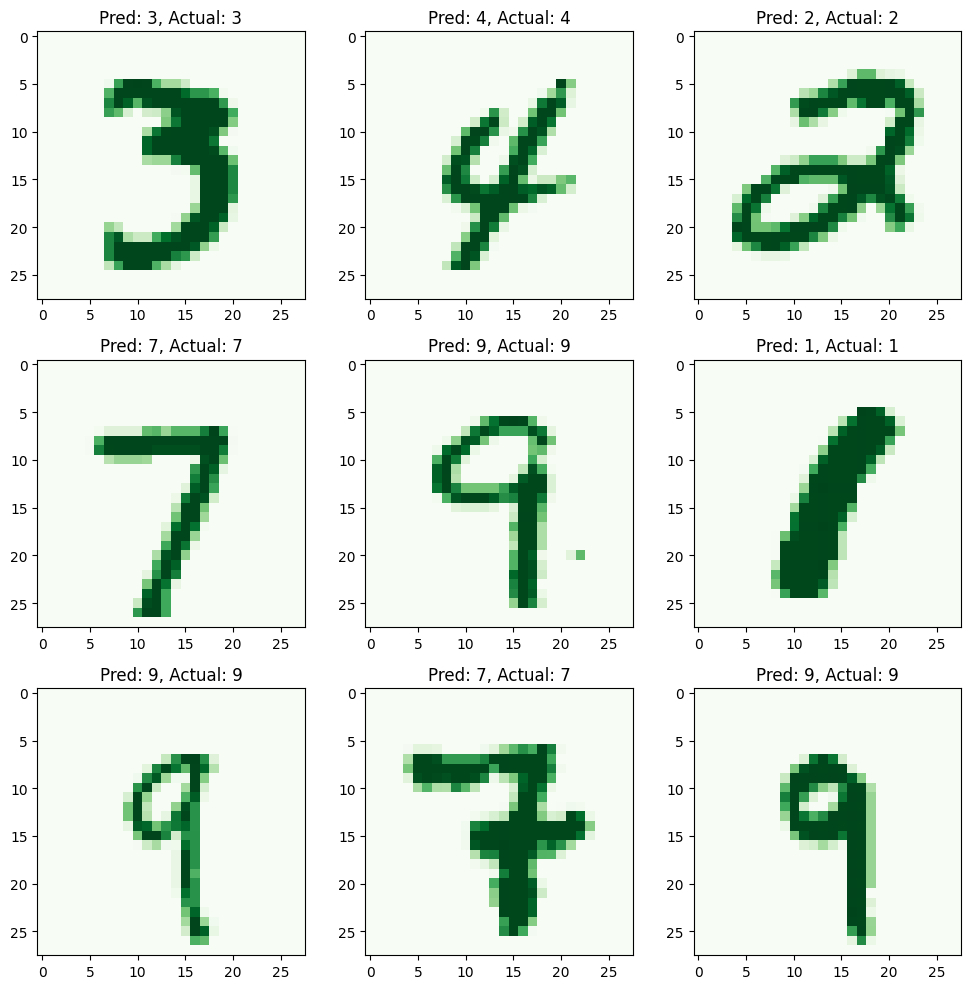

In [ ]:
num_images = 9
indices = np.random.choice(len(X_test), num_images, replace=False)
images = X_test[indices]

actual_labels = np.argmax(y_test[indices], axis=1)  # Get actual labels
predicted_labels = np.argmax(model_Cnn2.predict(images), axis=1)  # Predict labels


fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='Greens')
    ax.set_title(f'Pred: {predicted_labels[i]}, Actual: {actual_labels[i]}', fontsize=12)


plt.tight_layout()
plt.show();


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$